In [1]:
import pandas as pd
import numpy as np
from scipy.special import gamma

In [2]:
df = pd.read_csv("./data/VIXdata.txt")
df.columns=['Date_vix']

In [3]:
df['Date'] = df['Date_vix'].apply(lambda x:x[0:8])
df['vix'] = df['Date_vix'].apply(lambda x:x[9:])
df

,Date_vix,Date,vix
0,20010102 29.99,20010102,29.99
1,20010102 29.99,20010102,29.99
2,20010103 26.60,20010103,26.60
3,20010103 26.60,20010103,26.60
4,20010104 26.97,20010104,26.97
...,...,...,...
6185,20220725 23.36,20220725,23.36
6186,20220726 24.69,20220726,24.69
6187,20220727 23.24,20220727,23.24
6188,20220728 22.33,20220728,22.33


In [4]:
df['vix'] = df['vix'].apply(lambda x:str.replace(x,' ',''))
df['vix'] = df['vix'].apply(lambda x:0.0 if x=='.' else x)
df['vix'] = df['vix'].astype(float)

In [5]:
df['log_vix'] = np.log(df['vix'])
df['Date'] = pd.to_datetime(df['Date'])

D:\Anaconda3\envs\aip\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
D:\Anaconda3\envs\aip\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


D:\Anaconda3\envs\aip\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
D:\Anaconda3\envs\aip\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Anaconda3\envs\aip\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


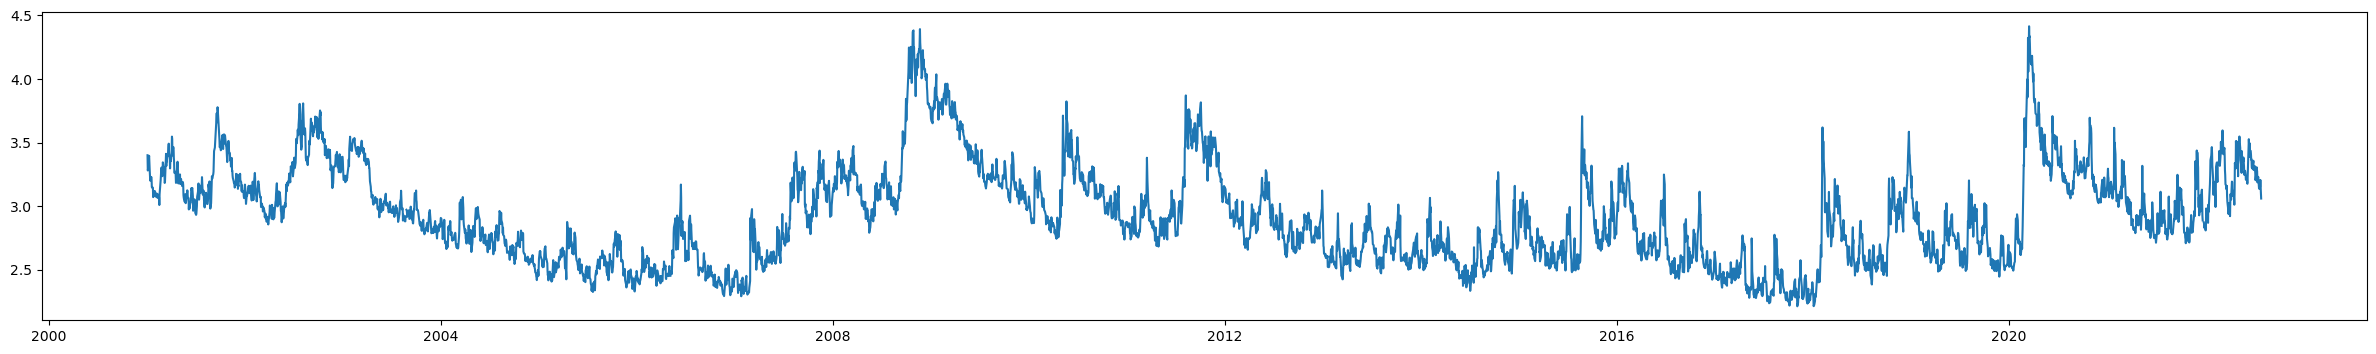

In [7]:
plt.figure(figsize=(30,4))
# plt.vlines(0, 0, 0.5, colors = "r", linestyles = "dashed")

plt.plot(df['Date'],df['log_vix'])
plt.show()

In [8]:
n = 500
df_ori = df[df['Date']>='20120101'][0:n].reset_index(drop=True)

In [9]:
df_ori

,Date_vix,Date,vix,log_vix
0,20120103 22.97,2012-01-03,22.97,3.134189
1,20120104 22.22,2012-01-04,22.22,3.100993
2,20120105 21.48,2012-01-05,21.48,3.067122
3,20120106 20.63,2012-01-06,20.63,3.026746
4,20120109 21.07,2012-01-09,21.07,3.047850
...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,2.623944
496,20131223 13.04,2013-12-23,13.04,2.568022
497,20131224 12.48,2013-12-24,12.48,2.524127
498,20131226 12.33,2013-12-26,12.33,2.512035


In [10]:
# df_ori['diff'] = df_ori['log_vix'].diff()

In [11]:
df_ori

,Date_vix,Date,vix,log_vix
0,20120103 22.97,2012-01-03,22.97,3.134189
1,20120104 22.22,2012-01-04,22.22,3.100993
2,20120105 21.48,2012-01-05,21.48,3.067122
3,20120106 20.63,2012-01-06,20.63,3.026746
4,20120109 21.07,2012-01-09,21.07,3.047850
...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,2.623944
496,20131223 13.04,2013-12-23,13.04,2.568022
497,20131224 12.48,2013-12-24,12.48,2.524127
498,20131226 12.33,2013-12-26,12.33,2.512035


In [12]:
value_first = df_ori['log_vix'].values[0]
value_first

3.134189016701007

In [13]:
df_ori['log_vix'] = df_ori['log_vix']-value_first

In [14]:
# from sklearn import linear_model
# #首先定义一个线性回归对象
# lr=linear_model.LinearRegression()
# #定义数据集

# #训练模型
# lr.fit(np.linspace(0,1,501).reshape(-1,1),df_ori['log_vix'])
# df_ori['lr'] = lr.predict(np.linspace(0,1,501).reshape(-1,1))
# df_ori['log_vix_min_lr'] = df_ori['log_vix']-df_ori['lr']
# df_ori

In [15]:
df_ori['log_vix'].mean()

-0.37499292132260836

In [17]:
df_ori['lr'] = 2*np.linspace(0,1,500)*df_ori['log_vix'].mean()

In [18]:
df_ori['x'] = df_ori['log_vix']-df_ori['lr']

In [19]:
df_ori['x'].mean()

2.842170943040401e-17

In [20]:
df_ori

,Date_vix,Date,vix,log_vix,lr,x
0,20120103 22.97,2012-01-03,22.97,0.000000,-0.000000,0.000000
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327
...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329


In [21]:
df_ori['y'] = df_ori['x'].diff()

In [22]:
df_ori

,Date_vix,Date,vix,log_vix,lr,x,y
0,20120103 22.97,2012-01-03,22.97,0.000000,-0.000000,0.000000,NaN
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693,-0.031693
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061,-0.032368
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934,-0.038873
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327,0.022607
...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589


In [23]:
df_ = df_ori.dropna()

In [24]:
df_

,Date_vix,Date,vix,log_vix,lr,x,y
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693,-0.031693
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061,-0.032368
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934,-0.038873
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327,0.022607
5,20120110 20.69,2012-01-10,20.69,-0.104539,-0.007515,-0.097024,-0.016697
...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589


In [25]:
df_['abs_y'] = np.abs(df_['y'])

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\799483149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['abs_y'] = np.abs(df_['y'])


In [26]:
df_['squared'] = df_['y']*df_['y']

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\22100943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['squared'] = df_['y']*df_['y']


In [27]:
df_

,Date_vix,Date,vix,log_vix,lr,x,y,abs_y,squared
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693,-0.031693,0.031693,0.001004
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061,-0.032368,0.032368,0.001048
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934,-0.038873,0.038873,0.001511
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327,0.022607,0.022607,0.000511
5,20120110 20.69,2012-01-10,20.69,-0.104539,-0.007515,-0.097024,-0.016697,0.016697,0.000279
...,...,...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268,0.024268,0.000589
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419,0.054419,0.002961
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391,0.042391,0.001797
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589,0.010589,0.000112


In [28]:
R1n = df_['abs_y'].mean()
R2n = df_['squared'].mean()

In [95]:
R1n*R1n/R2n

0.5173133514526878

In [96]:
from scipy.special import gamma
def obtain_gamma(value):
    value_ = np.power(gamma((value+1)/2),2)/gamma(value+0.5)
    return value_/np.sqrt(np.pi)
def obtain_lambda(target):
    left = 0
    right = 3
    mid = (left+right)/2
    while abs(obtain_gamma(mid)-target)>10**-8:
        if obtain_gamma(mid)>target:
            left = mid
            mid = (left+right)/2
        elif obtain_gamma(mid)<target:
            right = mid
            mid = (left+right)/2
        else:
            return mid
    return mid
# plt.plot(obtain_gamma(np.linspace(0,2,200)))
obtain_lambda(0.5173133514526878)

1.3300078958272934

In [30]:
lambda_ = 1.3271118956243062

In [31]:
df_['y_tilde'] = np.sign(df_['y'])*np.power(df_['abs_y'],1/lambda_)
df_

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\1714621091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['y_tilde'] = np.sign(df_['y'])*np.power(df_['abs_y'],1/lambda_)


,Date_vix,Date,vix,log_vix,lr,x,y,abs_y,squared,y_tilde
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693,-0.031693,0.031693,0.001004,-0.074209
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061,-0.032368,0.032368,0.001048,-0.075395
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934,-0.038873,0.038873,0.001511,-0.086552
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327,0.022607,0.022607,0.000511,0.057530
5,20120110 20.69,2012-01-10,20.69,-0.104539,-0.007515,-0.097024,-0.016697,0.016697,0.000279,-0.045785
...,...,...,...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268,0.024268,0.000589,-0.060687
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419,0.054419,0.002961,-0.111524
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391,0.042391,0.001797,-0.092391
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589,0.010589,0.000112,-0.032486


In [32]:
df_['u'] = np.cumsum(df_['y_tilde'])

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\4060495729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['u'] = np.cumsum(df_['y_tilde'])


In [33]:
df_

,Date_vix,Date,vix,log_vix,lr,x,y,abs_y,squared,y_tilde,u
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693,-0.031693,0.031693,0.001004,-0.074209,-0.074209
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061,-0.032368,0.032368,0.001048,-0.075395,-0.149604
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934,-0.038873,0.038873,0.001511,-0.086552,-0.236156
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327,0.022607,0.022607,0.000511,0.057530,-0.178626
5,20120110 20.69,2012-01-10,20.69,-0.104539,-0.007515,-0.097024,-0.016697,0.016697,0.000279,-0.045785,-0.224411
...,...,...,...,...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268,0.024268,0.000589,-0.060687,-0.044697
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419,0.054419,0.002961,-0.111524,-0.156221
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391,0.042391,0.001797,-0.092391,-0.248613
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589,0.010589,0.000112,-0.032486,-0.281099


In [34]:
df_['z_i'] = df_[['y','y_tilde']].apply(lambda x:np.sign(x[0])*np.power(abs(x[1]),lambda_),axis=1)
df_

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\2484257858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['z_i'] = df_[['y','y_tilde']].apply(lambda x:np.sign(x[0])*np.power(abs(x[1]),lambda_),axis=1)


,Date_vix,Date,vix,log_vix,lr,x,y,abs_y,squared,y_tilde,u,z_i
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693,-0.031693,0.031693,0.001004,-0.074209,-0.074209,-0.031693
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061,-0.032368,0.032368,0.001048,-0.075395,-0.149604,-0.032368
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934,-0.038873,0.038873,0.001511,-0.086552,-0.236156,-0.038873
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327,0.022607,0.022607,0.000511,0.057530,-0.178626,0.022607
5,20120110 20.69,2012-01-10,20.69,-0.104539,-0.007515,-0.097024,-0.016697,0.016697,0.000279,-0.045785,-0.224411,-0.016697
...,...,...,...,...,...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268,0.024268,0.000589,-0.060687,-0.044697,-0.024268
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419,0.054419,0.002961,-0.111524,-0.156221,-0.054419
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391,0.042391,0.001797,-0.092391,-0.248613,-0.042391
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589,0.010589,0.000112,-0.032486,-0.281099,-0.010589


In [35]:
from scipy.optimize import minimize, LinearConstraint

In [36]:
def objective_function(x, a,b):
    err = []
    for i in range(len(a)-1):
        err.append(np.power(a[i+1]-x[0]*a[i]-x[1]*b[i+1]-x[2],2))
#     print(err)
    return np.sum(err) #np.sqrt(np.sum(err))

In [37]:
a = df_['log_vix'].values
b = df_['z_i'].values
objective_function([ 0.99999985,  0.99999991, -0.00150125], a,b)

1.5850878871186192e-09

In [38]:
res = minimize(
    objective_function,
    x0=0.5 * np.random.random(3),
    args=(a,b),
)

In [97]:
x = res.x

In [98]:
x

array([ 0.99999985,  0.99999992, -0.00150304])

# 以及标题
## 测试H值

In [40]:
from hurst import compute_Hc, random_walk

# Use random_walk() function or generate a random walk series manually:
# series = random_walk(99999, cumprod=True)

series = df_['u'].values  # create a random walk from random changes

# Evaluate Hurst equation
H, c, data = compute_Hc(series, kind='random_walk', simplified=True)

In [41]:
H

0.3083541664826507

In [42]:
S = np.zeros([n+2,n+2])

In [43]:

for i in range(1,n+2):
    for j in range(1,n+2):
        S[i][j] = (np.power(i,2*H)+ np.power(j,2*H) -np.power(np.power(j-i,2),H))/2

In [44]:
S = S[1:,1:]

In [45]:
S

array([[ 1.        ,  0.76668631,  0.71781128, ...,  0.52851394,
         0.52849205,  0.52847022],
       [ 0.76668631,  1.53337263,  1.25118391, ...,  0.82373616,
         0.82369231,  0.82364858],
       [ 0.71781128,  1.25118391,  1.96899518, ...,  1.07010535,
         1.07003948,  1.0699738 ],
       ...,
       [ 0.52851394,  0.82373616,  1.07010535, ..., 46.12550029,
        45.65399234, 45.41577624],
       [ 0.52849205,  0.82369231,  1.07003948, ..., 45.65399234,
        46.18248439, 45.7109546 ],
       [ 0.52847022,  0.82364858,  1.0699738 , ..., 45.41577624,
        45.7109546 , 46.23942482]])

In [54]:
A = S[1:500,1:500]
A.shape

(499, 499)

In [55]:
A_ = np.linalg.inv(A)

In [56]:
A_.shape

(499, 499)

In [57]:
B_T = S[-1,1:500]


In [58]:
df_.shape

(499, 12)

In [59]:
np.dot(np.dot(B_T.reshape(1,-1),A_),df_['u'].values.reshape(-1,1))

array([[-0.23541628]])

In [60]:
df_['u'].values[-1]

-0.24542156222812567

In [61]:
v = np.dot(np.dot(B_T.reshape(1,-1),A_),df_['u'].values.reshape(-1,1))[0]-df_['u'].values[-1]

In [62]:
v

array([0.01000528])

In [63]:
np.sign(v)*np.power(abs(v),lambda_)

array([0.00221861])

In [64]:
np.sign(v)*np.power(abs(v),lambda_)

array([0.00221861])

In [65]:
df_['x'].values[-1]+np.sign(v)*np.power(abs(v),lambda_)

array([0.14053895])

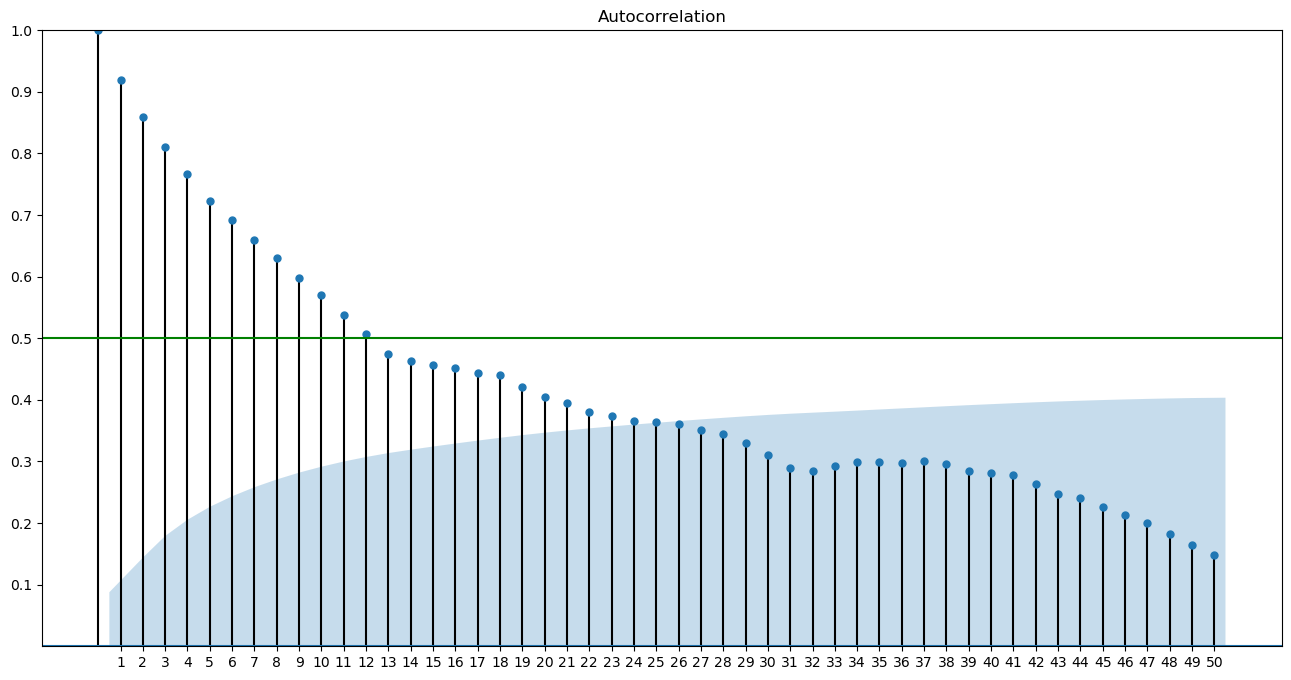

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(df_['log_vix'], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

In [67]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df_['log_vix'], lags=12).fit()

D:\Anaconda3\envs\aip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
model.forecast(1).to_list()

D:\Anaconda3\envs\aip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[-0.5921493215216929]

In [69]:
model.predict(start=0, end=df_.shape[0], dynamic=False)

D:\Anaconda3\envs\aip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
495   -0.500784
496   -0.547806
497   -0.569591
498   -0.602598
499   -0.592149
Length: 500, dtype: float64

In [70]:
df_['ar'] = model.predict(start=0, end=df_.shape[0], dynamic=False)
df_

D:\Anaconda3\envs\aip\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\4101972680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['ar'] = model.predict(start=0, end=df_.shape[0], dynamic=False)


,Date_vix,Date,vix,log_vix,lr,x,y,abs_y,squared,y_tilde,u,z_i,ar
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693,-0.031693,0.031693,0.001004,-0.074209,-0.074209,-0.031693,NaN
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061,-0.032368,0.032368,0.001048,-0.075395,-0.149604,-0.032368,NaN
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934,-0.038873,0.038873,0.001511,-0.086552,-0.236156,-0.038873,NaN
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327,0.022607,0.022607,0.000511,0.057530,-0.178626,0.022607,NaN
5,20120110 20.69,2012-01-10,20.69,-0.104539,-0.007515,-0.097024,-0.016697,0.016697,0.000279,-0.045785,-0.224411,-0.016697,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268,0.024268,0.000589,-0.060687,-0.044697,-0.024268,-0.500784
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419,0.054419,0.002961,-0.111524,-0.156221,-0.054419,-0.547806
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391,0.042391,0.001797,-0.092391,-0.248613,-0.042391,-0.569591
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589,0.010589,0.000112,-0.032486,-0.281099,-0.010589,-0.602598


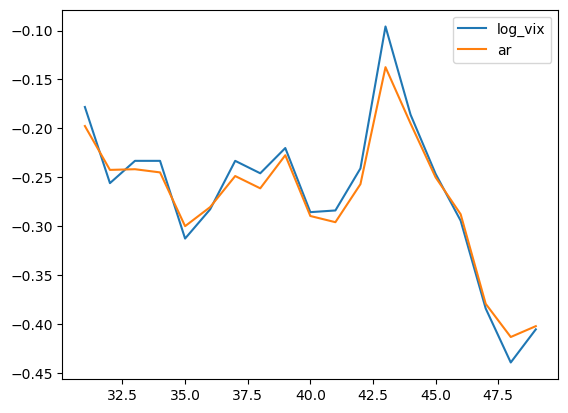

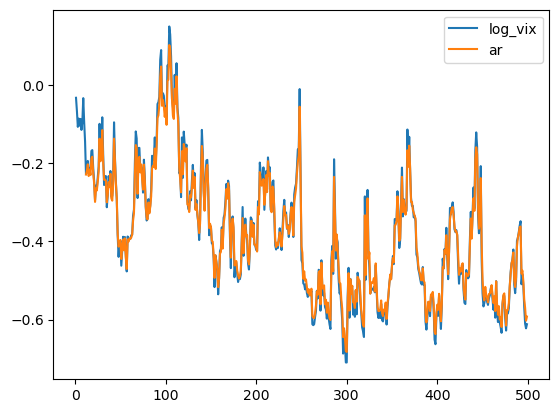

In [71]:
df_[(df_.index<50)&(df_.index>30)][['log_vix','ar']].plot()
df_[['log_vix','ar']].plot()

In [72]:
df_ar = df_.dropna()
df_ar

,Date_vix,Date,vix,log_vix,lr,x,y,abs_y,squared,y_tilde,u,z_i,ar
12,20120120 18.28,2012-01-20,18.28,-0.228381,-0.018036,-0.210346,-0.081901,0.081901,0.006708,-0.151755,-0.432343,-0.081901,-0.229242
13,20120123 18.67,2012-01-23,18.67,-0.207271,-0.019539,-0.187732,0.022613,0.022613,0.000511,0.057542,-0.374800,0.022613,-0.219675
14,20120124 18.91,2012-01-24,18.91,-0.194498,-0.021042,-0.173456,0.014276,0.014276,0.000204,0.040688,-0.334113,0.014276,-0.203149
15,20120125 18.31,2012-01-25,18.31,-0.226742,-0.022545,-0.204197,-0.030741,0.030741,0.000945,-0.072521,-0.406634,-0.030741,-0.233150
16,20120126 18.57,2012-01-26,18.57,-0.212642,-0.024048,-0.188594,0.015603,0.015603,0.000243,0.043506,-0.363128,0.015603,-0.217050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268,0.024268,0.000589,-0.060687,-0.044697,-0.024268,-0.500784
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419,0.054419,0.002961,-0.111524,-0.156221,-0.054419,-0.547806
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391,0.042391,0.001797,-0.092391,-0.248613,-0.042391,-0.569591
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589,0.010589,0.000112,-0.032486,-0.281099,-0.010589,-0.602598


In [73]:
df_ar['err'] = abs(df_ar['log_vix']-df_ar['ar'])

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\3724867053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar['err'] = abs(df_ar['log_vix']-df_ar['ar'])


In [74]:
df_ar['err'].mean()

0.013147489300877413

In [75]:
df_self = df_

In [76]:
df_self['log_vix_shift'] = df_self['log_vix'].shift(1)
df_self

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\3398033137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_self['log_vix_shift'] = df_self['log_vix'].shift(1)


,Date_vix,Date,vix,log_vix,lr,x,y,abs_y,squared,y_tilde,u,z_i,ar,log_vix_shift
1,20120104 22.22,2012-01-04,22.22,-0.033196,-0.001503,-0.031693,-0.031693,0.031693,0.001004,-0.074209,-0.074209,-0.031693,NaN,NaN
2,20120105 21.48,2012-01-05,21.48,-0.067067,-0.003006,-0.064061,-0.032368,0.032368,0.001048,-0.075395,-0.149604,-0.032368,NaN,-0.033196
3,20120106 20.63,2012-01-06,20.63,-0.107443,-0.004509,-0.102934,-0.038873,0.038873,0.001511,-0.086552,-0.236156,-0.038873,NaN,-0.067067
4,20120109 21.07,2012-01-09,21.07,-0.086339,-0.006012,-0.080327,0.022607,0.022607,0.000511,0.057530,-0.178626,0.022607,NaN,-0.107443
5,20120110 20.69,2012-01-10,20.69,-0.104539,-0.007515,-0.097024,-0.016697,0.016697,0.000279,-0.045785,-0.224411,-0.016697,NaN,-0.086339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268,0.024268,0.000589,-0.060687,-0.044697,-0.024268,-0.500784,-0.484474
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419,0.054419,0.002961,-0.111524,-0.156221,-0.054419,-0.547806,-0.510245
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391,0.042391,0.001797,-0.092391,-0.248613,-0.042391,-0.569591,-0.566167
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589,0.010589,0.000112,-0.032486,-0.281099,-0.010589,-0.602598,-0.610062


In [77]:
df_self = df_self.dropna()

In [78]:
params = [ 0.99999985,  0.99999991, -0.00150125]

In [79]:
df_self['self'] = params[0]*df_self['log_vix_shift']+params[1]*df_self['z_i']+params[2]

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_16320\4043629811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_self['self'] = params[0]*df_self['log_vix_shift']+params[1]*df_self['z_i']+params[2]


In [80]:
df_self

,Date_vix,Date,vix,log_vix,lr,x,y,abs_y,squared,y_tilde,u,z_i,ar,log_vix_shift,self
12,20120120 18.28,2012-01-20,18.28,-0.228381,-0.018036,-0.210346,-0.081901,0.081901,0.006708,-0.151755,-0.432343,-0.081901,-0.229242,-0.144978,-0.228380
13,20120123 18.67,2012-01-23,18.67,-0.207271,-0.019539,-0.187732,0.022613,0.022613,0.000511,0.057542,-0.374800,0.022613,-0.219675,-0.228381,-0.207269
14,20120124 18.91,2012-01-24,18.91,-0.194498,-0.021042,-0.173456,0.014276,0.014276,0.000204,0.040688,-0.334113,0.014276,-0.203149,-0.207271,-0.194496
15,20120125 18.31,2012-01-25,18.31,-0.226742,-0.022545,-0.204197,-0.030741,0.030741,0.000945,-0.072521,-0.406634,-0.030741,-0.233150,-0.194498,-0.226740
16,20120126 18.57,2012-01-26,18.57,-0.212642,-0.024048,-0.188594,0.015603,0.015603,0.000243,0.043506,-0.363128,0.015603,-0.217050,-0.226742,-0.212640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20131220 13.79,2013-12-20,13.79,-0.510245,-0.743974,0.233729,-0.024268,0.024268,0.000589,-0.060687,-0.044697,-0.024268,-0.500784,-0.484474,-0.510244
496,20131223 13.04,2013-12-23,13.04,-0.566167,-0.745477,0.179309,-0.054419,0.054419,0.002961,-0.111524,-0.156221,-0.054419,-0.547806,-0.510245,-0.566166
497,20131224 12.48,2013-12-24,12.48,-0.610062,-0.746980,0.136918,-0.042391,0.042391,0.001797,-0.092391,-0.248613,-0.042391,-0.569591,-0.566167,-0.610060
498,20131226 12.33,2013-12-26,12.33,-0.622154,-0.748483,0.126329,-0.010589,0.010589,0.000112,-0.032486,-0.281099,-0.010589,-0.602598,-0.610062,-0.622152


In [81]:
np.mean(abs(df_self['log_vix']-df_self['self']))

1.7847821675952925e-06